In [1]:
import sqlalchemy
import pandas as pd
import numpy as np
import sql_functions as sf

from sql_functions import *
import psycopg2

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
schema = 'capstone_jmrs'
spotahome_eda = sf.get_dataframe(f'SELECT * FROM {schema}.spotahome_merged')
spotahome_eda

,platform_id,platform,neighborhood,property_type,price_pcm,title,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from
0,641938,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07
1,641933,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07
2,641942,spotahome,Hammersmith and Fulham,Apartment,6370,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6370,NaN,2.0,NaN,3,2022-11-10
3,641951,spotahome,Hammersmith and Fulham,Apartment,6950,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6950,NaN,2.0,NaN,3,2022-11-10
4,641966,spotahome,Hammersmith and Fulham,Apartment,6700,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6700,NaN,2.0,NaN,3,2022-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,421825,spotahome,City of London,Apartment,6840,Serviced 2-bedroom apartment for rent in Liver...,furnished,,,2022-10-04,6840,NaN,NaN,NaN,2,2022-12-31
832,426714,spotahome,City of London,Apartment,3700,"2-Bedroom Apartment for rent in Blackfriars, L...",furnished,,,2022-10-04,3700,NaN,NaN,NaN,2,2024-06-12
833,370673,spotahome,Camden,Apartment,6500,Serviced2-bedroom apartment for rent in King's...,furnished,,,2022-10-04,6500,NaN,1.0,NaN,2,2022-12-01
834,456533,spotahome,Hackney,Apartment,2395,Whole 2 bedrooms apartment in London,furnished,,,2022-10-04,2395,NaN,1.0,NaN,2,2022-11-20


In [3]:
spotahome_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform_id      836 non-null    int64  
 1   platform         836 non-null    object 
 2   neighborhood     836 non-null    object 
 3   property_type    836 non-null    object 
 4   price_pcm        836 non-null    object 
 5   title            836 non-null    object 
 6   furniture        836 non-null    object 
 7   let_type         836 non-null    object 
 8   available_today  836 non-null    object 
 9   scraping_date    836 non-null    object 
 10  price_pcm_0      836 non-null    int64  
 11  price_pcm_1      247 non-null    float64
 12  bathrooms        519 non-null    float64
 13  size_sqm         262 non-null    float64
 14  bedrooms         836 non-null    int64  
 15  available_from   836 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory usage: 104.6+ KB


In [4]:
spotahome_eda.describe()

,platform_id,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms
count,836.000000,836.000000,247.000000,519.000000,262.000000,836.000000
mean,547292.527512,4399.885167,7997.336032,1.315992,60.110687,1.263158
std,159792.599859,1938.790440,3801.954404,0.636983,35.074075,1.104214
min,98665.000000,1112.000000,2881.000000,1.000000,12.000000,0.000000
25%,422259.250000,3090.000000,5500.000000,1.000000,40.000000,0.000000
50%,573947.500000,4125.000000,7200.000000,1.000000,55.000000,1.000000
75%,642348.250000,5221.250000,9218.500000,1.000000,75.000000,2.000000
max,892606.000000,13614.000000,27372.000000,5.000000,350.000000,6.000000


In [5]:
spotahome_eda.corr()

,platform_id,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms
platform_id,1.000000,0.174076,0.040142,0.144353,0.156237,-0.001443
price_pcm_0,0.174076,1.000000,0.775776,0.489896,0.410722,0.523653
price_pcm_1,0.040142,0.775776,1.000000,0.653239,0.688852,0.720156
bathrooms,0.144353,0.489896,0.653239,1.000000,0.731517,0.620871
size_sqm,0.156237,0.410722,0.688852,0.731517,1.000000,0.802987
bedrooms,-0.001443,0.523653,0.720156,0.620871,0.802987,1.000000


In [6]:
spotahome_eda['avg_price_sqm'] = spotahome_eda[['price_pcm_0', 'price_pcm_1']].mean(axis=1, skipna=True)

In [7]:
spotahome_eda

,platform_id,platform,neighborhood,property_type,price_pcm,title,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from,avg_price_sqm
0,641938,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07,7000.0
1,641933,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07,7000.0
2,641942,spotahome,Hammersmith and Fulham,Apartment,6370,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6370,NaN,2.0,NaN,3,2022-11-10,6370.0
3,641951,spotahome,Hammersmith and Fulham,Apartment,6950,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6950,NaN,2.0,NaN,3,2022-11-10,6950.0
4,641966,spotahome,Hammersmith and Fulham,Apartment,6700,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6700,NaN,2.0,NaN,3,2022-11-10,6700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,421825,spotahome,City of London,Apartment,6840,Serviced 2-bedroom apartment for rent in Liver...,furnished,,,2022-10-04,6840,NaN,NaN,NaN,2,2022-12-31,6840.0
832,426714,spotahome,City of London,Apartment,3700,"2-Bedroom Apartment for rent in Blackfriars, L...",furnished,,,2022-10-04,3700,NaN,NaN,NaN,2,2024-06-12,3700.0
833,370673,spotahome,Camden,Apartment,6500,Serviced2-bedroom apartment for rent in King's...,furnished,,,2022-10-04,6500,NaN,1.0,NaN,2,2022-12-01,6500.0
834,456533,spotahome,Hackney,Apartment,2395,Whole 2 bedrooms apartment in London,furnished,,,2022-10-04,2395,NaN,1.0,NaN,2,2022-11-20,2395.0


In [8]:
def my_func(x):
    try:
        return int(x['avg_price_sqm']) / int(x['size_sqm'])
    except (ZeroDivisionError, ValueError):
        return int(x['avg_price_sqm']) / 1

spotahome_eda["price_per_sqm"] = spotahome_eda.apply(my_func, axis=1)

In [9]:
spotahome_eda

,platform_id,platform,neighborhood,property_type,price_pcm,title,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from,avg_price_sqm,price_per_sqm
0,641938,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07,7000.0,7000.0
1,641933,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07,7000.0,7000.0
2,641942,spotahome,Hammersmith and Fulham,Apartment,6370,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6370,NaN,2.0,NaN,3,2022-11-10,6370.0,6370.0
3,641951,spotahome,Hammersmith and Fulham,Apartment,6950,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6950,NaN,2.0,NaN,3,2022-11-10,6950.0,6950.0
4,641966,spotahome,Hammersmith and Fulham,Apartment,6700,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6700,NaN,2.0,NaN,3,2022-11-10,6700.0,6700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,421825,spotahome,City of London,Apartment,6840,Serviced 2-bedroom apartment for rent in Liver...,furnished,,,2022-10-04,6840,NaN,NaN,NaN,2,2022-12-31,6840.0,6840.0
832,426714,spotahome,City of London,Apartment,3700,"2-Bedroom Apartment for rent in Blackfriars, L...",furnished,,,2022-10-04,3700,NaN,NaN,NaN,2,2024-06-12,3700.0,3700.0
833,370673,spotahome,Camden,Apartment,6500,Serviced2-bedroom apartment for rent in King's...,furnished,,,2022-10-04,6500,NaN,1.0,NaN,2,2022-12-01,6500.0,6500.0
834,456533,spotahome,Hackney,Apartment,2395,Whole 2 bedrooms apartment in London,furnished,,,2022-10-04,2395,NaN,1.0,NaN,2,2022-11-20,2395.0,2395.0


In [10]:
spotahome_eda['price_per_sqm'] = spotahome_eda['price_per_sqm'].round(decimals = 2)

In [11]:
spotahome_eda

,platform_id,platform,neighborhood,property_type,price_pcm,title,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from,avg_price_sqm,price_per_sqm
0,641938,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07,7000.0,7000.0
1,641933,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07,7000.0,7000.0
2,641942,spotahome,Hammersmith and Fulham,Apartment,6370,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6370,NaN,2.0,NaN,3,2022-11-10,6370.0,6370.0
3,641951,spotahome,Hammersmith and Fulham,Apartment,6950,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6950,NaN,2.0,NaN,3,2022-11-10,6950.0,6950.0
4,641966,spotahome,Hammersmith and Fulham,Apartment,6700,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6700,NaN,2.0,NaN,3,2022-11-10,6700.0,6700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,421825,spotahome,City of London,Apartment,6840,Serviced 2-bedroom apartment for rent in Liver...,furnished,,,2022-10-04,6840,NaN,NaN,NaN,2,2022-12-31,6840.0,6840.0
832,426714,spotahome,City of London,Apartment,3700,"2-Bedroom Apartment for rent in Blackfriars, L...",furnished,,,2022-10-04,3700,NaN,NaN,NaN,2,2024-06-12,3700.0,3700.0
833,370673,spotahome,Camden,Apartment,6500,Serviced2-bedroom apartment for rent in King's...,furnished,,,2022-10-04,6500,NaN,1.0,NaN,2,2022-12-01,6500.0,6500.0
834,456533,spotahome,Hackney,Apartment,2395,Whole 2 bedrooms apartment in London,furnished,,,2022-10-04,2395,NaN,1.0,NaN,2,2022-11-20,2395.0,2395.0


In [12]:
def my_func(x):
    try:
        return int(x['avg_price_sqm']) / int(x['bedrooms'])
    except (ZeroDivisionError, ValueError):
        return int(x['avg_price_sqm']) / 1

spotahome_eda["price_per_bedroom"] = spotahome_eda.apply(my_func, axis=1)

In [13]:
spotahome_eda

,platform_id,platform,neighborhood,property_type,price_pcm,title,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from,avg_price_sqm,price_per_sqm,price_per_bedroom
0,641938,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07,7000.0,7000.0,2333.333333
1,641933,spotahome,Hammersmith and Fulham,Apartment,7000,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,7000,NaN,4.0,NaN,3,2022-11-07,7000.0,7000.0,2333.333333
2,641942,spotahome,Hammersmith and Fulham,Apartment,6370,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6370,NaN,2.0,NaN,3,2022-11-10,6370.0,6370.0,2123.333333
3,641951,spotahome,Hammersmith and Fulham,Apartment,6950,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6950,NaN,2.0,NaN,3,2022-11-10,6950.0,6950.0,2316.666667
4,641966,spotahome,Hammersmith and Fulham,Apartment,6700,"3-bedroom apartment for rent in Hammersmith, L...",furnished,,,2022-10-04,6700,NaN,2.0,NaN,3,2022-11-10,6700.0,6700.0,2233.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,421825,spotahome,City of London,Apartment,6840,Serviced 2-bedroom apartment for rent in Liver...,furnished,,,2022-10-04,6840,NaN,NaN,NaN,2,2022-12-31,6840.0,6840.0,3420.000000
832,426714,spotahome,City of London,Apartment,3700,"2-Bedroom Apartment for rent in Blackfriars, L...",furnished,,,2022-10-04,3700,NaN,NaN,NaN,2,2024-06-12,3700.0,3700.0,1850.000000
833,370673,spotahome,Camden,Apartment,6500,Serviced2-bedroom apartment for rent in King's...,furnished,,,2022-10-04,6500,NaN,1.0,NaN,2,2022-12-01,6500.0,6500.0,3250.000000
834,456533,spotahome,Hackney,Apartment,2395,Whole 2 bedrooms apartment in London,furnished,,,2022-10-04,2395,NaN,1.0,NaN,2,2022-11-20,2395.0,2395.0,1197.500000


In [14]:
spotahome_eda['price_per_bedroom'] = spotahome_eda['price_per_bedroom'].round(decimals = 2)

In [15]:
spotahome_eda.describe()

,platform_id,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,avg_price_sqm,price_per_sqm,price_per_bedroom
count,836.000000,836.000000,247.000000,519.000000,262.000000,836.000000,836.000000,836.000000,836.000000
mean,547292.527512,4399.885167,7997.336032,1.315992,60.110687,1.263158,4834.543660,3292.675861,3410.121124
std,159792.599859,1938.790440,3801.954404,0.636983,35.074075,1.104214,2423.752431,2949.302961,1419.266020
min,98665.000000,1112.000000,2881.000000,1.000000,12.000000,0.000000,1200.000000,14.750000,420.000000
25%,422259.250000,3090.000000,5500.000000,1.000000,40.000000,0.000000,3300.000000,130.712500,2345.832500
50%,573947.500000,4125.000000,7200.000000,1.000000,55.000000,1.000000,4407.000000,3422.000000,3300.000000
75%,642348.250000,5221.250000,9218.500000,1.000000,75.000000,2.000000,5700.000000,4900.000000,4346.250000
max,892606.000000,13614.000000,27372.000000,5.000000,350.000000,6.000000,19751.000000,19751.000000,12200.000000


In [16]:
spotahome_eda['neighborhood'].value_counts()

Kensington and Chelsea    259
City of Westminster       177
Camden                    139
Tower Hamlets              61
Hackney                    51
Islington                  46
Hammersmith and Fulham     43
Lambeth                    41
City of London             19
Name: neighborhood, dtype: int64

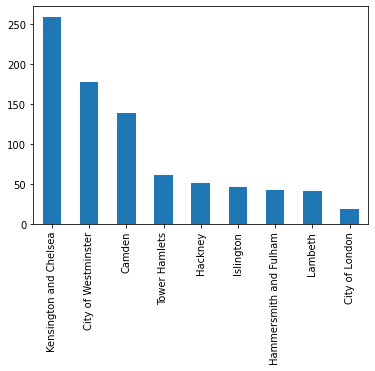

In [17]:
spotahome_eda['neighborhood'].value_counts().plot(kind='bar');

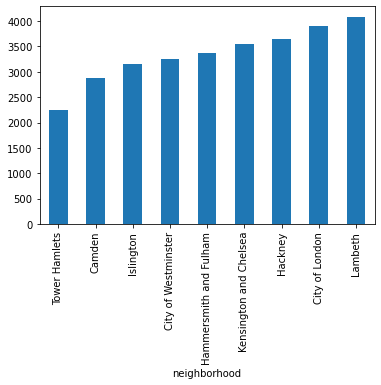

In [18]:
spotahome_eda.groupby('neighborhood')['price_per_sqm'].mean().sort_values().plot(kind='bar');

In [19]:
# call the schema created for this project
schema = 'capstone_jmrs'
# get the function to connect to the database
engine = get_engine()

# give the table a unique name
table_name = 'spotahome_eda'

# import the table to sql
if engine != None:
    try:
        spotahome_eda.to_sql(name=table_name,
                                   con=engine,
                                   if_exists='replace',
                                   schema=schema,
                                   index=False,
                                   chunksize=5000,
                                   method='multi')
        print(f"The {table_name} table was imported successfully.")

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None


The spotahome_eda table was imported successfully.
